# Importing Libraries

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format',  '{:.2f}'.format)

# Project Definition, Gathering and Observing Data

In [226]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL (5).csv
User uploaded file "Melbourne_housing_FULL (5).csv" with length 5018236 bytes


In [227]:
df = pd.read_csv ("Melbourne_housing_FULL.csv")
df = df.copy()
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,4.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00


In [228]:
# Observe the first 5 columns

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [229]:
# Data Shapes

print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n'
      f'Dimension : {df.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


# Exploratory Data Analysis

In [230]:
# Examining the descriptive statistics of dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [231]:
# Examining the descriptive statistics of dataset

df.isna().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [232]:
# Define the variables categorically.

numeric_columns=['Rooms','Price', 'Postcode','Bedroom2','Bathroom','Car','Landsize', 'BuildingArea', 'YearBuilt','Lattitude','Longtitude','Propertycount']
category_columns=['Suburb','Address','Type','Method','SellerG','Date', 'CouncilArea', 'Regionname']


In [233]:
# Dublicated Data

df.duplicated().sum()

1

In [234]:
df.loc[df.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


In [235]:
# Deletion of Dublicated Data

df = df.drop_duplicates()

In [236]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34855.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34855.00,3116.06,109.03,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26639.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26630.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26128.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23046.00,593.61,3398.92,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13741.00,160.25,401.28,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15550.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


In [237]:
# Clearing outlier data in the dataset. ("Landsize" and "Buildingarea" variables.)

# Using z-score method while detecting outliers

# Numerical Columns

# numeric_columns = [column for column in df.columns if df[column].dtype != "object"]

# Mean ve std valu calculation

mean = df[numeric_columns].mean()
std = df[numeric_columns].std()

# Z-scores

z_scores = (df[numeric_columns] - mean) / std

# Outliers

outliers = z_scores[np.abs(z_scores) >= 3]

# Print

print(outliers)

       Rooms  Price  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount
0        NaN    NaN       NaN       NaN       NaN  NaN       NaN           NaN        NaN        NaN         NaN            NaN
1        NaN    NaN       NaN       NaN       NaN  NaN       NaN           NaN        NaN        NaN         NaN            NaN
2        NaN    NaN       NaN       NaN       NaN  NaN       NaN           NaN        NaN        NaN         NaN            NaN
3        NaN    NaN       NaN       NaN       NaN  NaN       NaN           NaN        NaN        NaN         NaN            NaN
4        NaN    NaN       NaN       NaN       NaN  NaN       NaN           NaN        NaN        NaN         NaN            NaN
...      ...    ...       ...       ...       ...  ...       ...           ...        ...        ...         ...            ...
34852    NaN    NaN       NaN       NaN       NaN  NaN       NaN           NaN        NaN        NaN    

In [238]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,4.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00


In [239]:
# Missing values are in the bathroom and car variables. Filling the missing values using the mode method.

# for column in category_columns:
# df[column] = df[column].fillna(df[column].mode().iloc[0])

def outlier_thresholds(df, bathroom, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[bathroom].quantile(low_quantile)
    Q3 = df[bathroom].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    return low_limit, up_limit


In [240]:
 def outlier_thresholds(df, car, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[car].quantile(low_quantile)
    Q3 = df[car].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    return low_limit, up_limit

# Data Visualisation

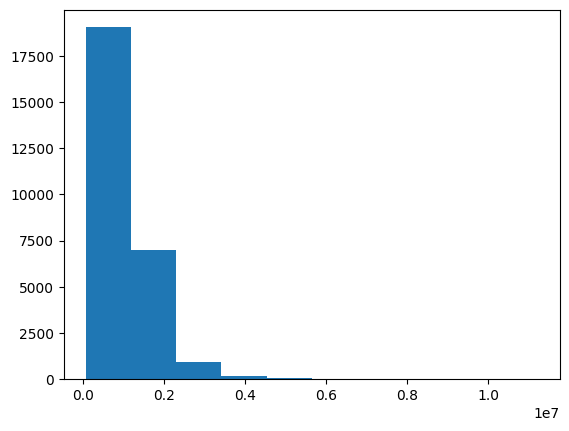

In [241]:
# Build a Histogram to visualize price distribution,

plt.hist(df["Price"])
plt.show()



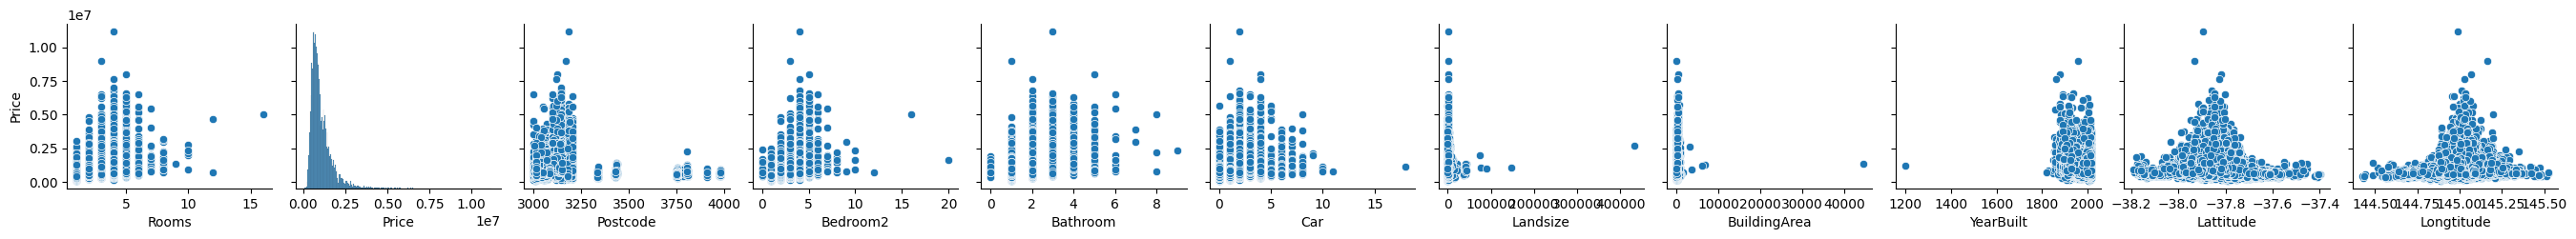

In [242]:
# Draw a pair plot to see the relationship between all numerical variables and the price variable.

sns.pairplot(df[numeric_columns], x_vars=numeric_columns[:-1], y_vars='Price')


<Axes: >

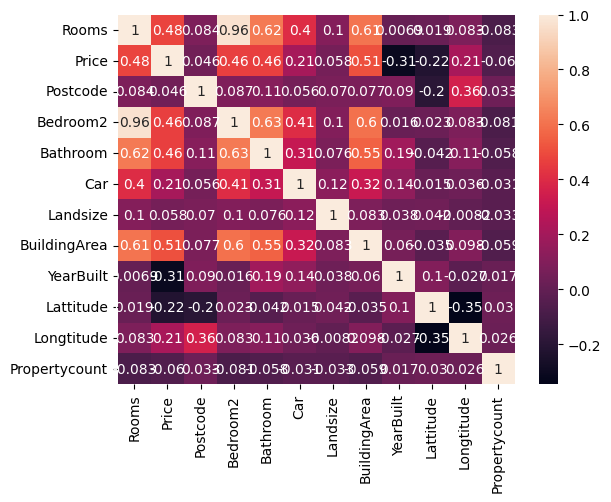

In [243]:
# Draw a correlation matrix by using a heatmap on seaborn

# correlation_matrix = df[numeric_columns].corr()

correlation_matrix = df[numeric_columns].dropna().corr()

sns.heatmap(correlation_matrix, annot=True)


In [244]:
df.nunique()


Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [ ]:
# Implement Label Encoder and One Hot encoder for categorical variables

category_columns=['Suburb','Address','Type','Method','SellerG','Date', 'CouncilArea', 'Regionname']

# Label Encoder uygula
for column in category_columns:
    df.loc[:, column] = LabelEncoder().fit_transform(df[column])

# One Hot Encoder uygula
df = pd.get_dummies(df, columns=category_columns)

# Veriyi göster
print(df)



# Model Selection

In [246]:
# Determine x and y variables,

# Target variable as y
y = df['Price']

# Other variables as x
x = df.drop('Price', axis=1)


In [247]:
# Splitting data into train-test in order to increase the performance of model training

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)


In [248]:
y = df['Price']
x = df.drop('Price', axis=1)

In [249]:
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (26142, 34893)
Shape of x_test is (8714, 34893)
Shape of y_train is (26142,)
Shape of y_test is (8714,)


In [250]:
pip install pygments

In [251]:
# Train your models using preprocessed data with the models mentioned below

from pygments import highlight
from pygments.lexers import PythonLexer

from sklearn.linear_model import Lasso
lasso = Lasso()

from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

models = {
'Lasso': {'model': Lasso()},
'LinearRegression': {'model': LinearRegression()},
'Ridge': {'model': Ridge()},
'ElasticNet': {'model': ElasticNet()},
'KNeighborsRegressor': {'model': KNeighborsRegressor()},
'RandomForestRegressor': {'model': RandomForestRegressor()},
'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)},
}


In [252]:
# Lasso modeli
print(models['Lasso']['model'])

# LinearRegression modeli
print(models['LinearRegression']['model'])

# Ridge modeli
print(models['Ridge']['model'])

# ElasticNet modeli
print(models['ElasticNet']['model'])

# KNeighborsRegressor modeli
print(models['KNeighborsRegressor']['model'])

# RandomForestRegressor modeli
print(models['RandomForestRegressor']['model'])

# GradientBoostingRegressor modeli
print(models['GradientBoostingRegressor']['model'])

# AdaBoostRegressor modeli
print(models['AdaBoostRegressor']['model'])

Lasso()
LinearRegression()
Ridge()
ElasticNet()
KNeighborsRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(learning_rate=1.2, loss='exponential', n_estimators=5,
                  random_state=2)


In [253]:
models = [('LR', LogisticRegression(random_state=17, solver='lbfgs', max_iter=3000)),
          ('CART', DecisionTreeClassifier(random_state=17)),
          ('RF', RandomForestClassifier(random_state=17)),
          ('XGB', XGBClassifier(random_state=17, eval_metric='logloss')),
          ('LightGBM', LGBMClassifier(random_state=17, verbose=-1))]

# Model Evaluation

In [ ]:
models = {
  'LinearRegression': LinearRegression(),
  'Ridge': Ridge(),
  'Lasso': Lasso(),
  'ElasticNet': ElasticNet(),
  'RandomForestRegressor': RandomForestRegressor(),
  'GradientBoostingRegressor': GradientBoostingRegressor(),
  'AdaBoostRegressor': AdaBoostRegressor()
}

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

# Evaluate each model and store the results in the DataFrame
for name, model in models.items():
  cv_results = cross_validate(model, x, y, cv=10, scoring=['mae', 'mse', 'rmse', 'r2'])
  results.loc[name] = [name, cv_results['test_mae'].mean(), cv_results['test_mse'].mean(), cv_results['test_rmse'].mean(), cv_results['test_r2'].mean()]

# Sort the DataFrame by the R2 score
results = results.sort_values(by='R2', ascending=False)

# Print the results
print(results)